# Ford GoBike System Data
## by Shahad asseri

## Investigation Overview

-The main goal of this project  is to investigate the main features:

1. What is The month that provides the most service

2. What is the distribution of the user type variable

3. Does being a Casual or a Member differ in the average time duration of driving a bicycle

4. What is The relationship between trip duration and seasons

5. How does the average trip duration diff between the user based on the day of the week

## Dataset Overview
- The chosen dataset includes 519700 trips(rows) with 13 features (columns) as below: trip duration in seconds , start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type.
Most variables are numeric as shown:(duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id).
while (start_time,end_time,start_station_name,end_station_name,user_type) are string object.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# Load the datasets for the year 2017:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [6]:
# copy the dataset befor Wrangling the data:
df_clean = df.copy()

In [7]:
# Change the value of user_type to more meaningful names:
df_clean.user_type.replace(['Customer', 'Subscriber'], ['Casual', 'Member'], inplace=True)

In [9]:
# Before start ,I need to create a month and a day columns to perform my process:

# Convert start_time to Datetime to extract the month:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

# Now I can extract the Day in the column:
df_clean['day'] = df_clean['start_time'].dt.strftime('%a')
# Now I can extract the month in the column:
df_clean['month']= df_clean['start_time'].dt.strftime('%b')



## (Visualization 1)

- The month that provides the most service, As shown the October month is the most month that provides more of rides:

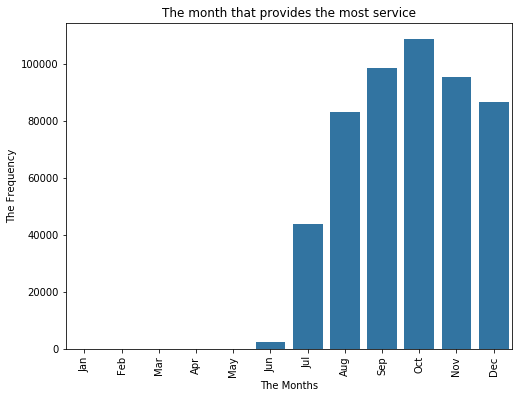

In [10]:
# Create a variable for month:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                 'Sep', 'Oct', 'Nov', 'Dec']

# Create a figure with a specific size:
plt.figure(figsize=[8,6]) 

# Use the base color to avoid any risk:
base_color = sb.color_palette()[0]

# Plot the month that provides the most service:
sb.countplot(data = df_clean, x='month', order=months, color=base_color)
 
# Put the labels:
plt.title('The month that provides the most service')
plt.xlabel('The Months')
plt.ylabel('The Frequency')
plt.xticks(rotation = 90) 

# Show the plot:
plt.show();

## (Visualization 2)
This plot describes How a customer or subscriber differ in the average time duration of driving a bicycle
- There is higer concentration customers that a high travel duration (1500~s - 4000s) than subscriber
- There is higer concentration subscriber that a low travel duration (0~ - 750~s) than customers

So, yes it does make a diffrence in the average duration time.

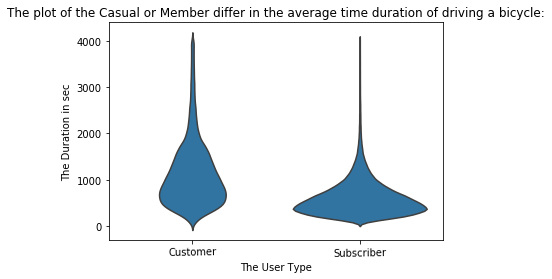

In [12]:
# Use the base color to avoid any risk:
base_color = sb.color_palette()[0]
# Plot the customer or subscriber differ in the average time duration of driving a bicycle
sb.violinplot(data = df.query("duration_sec <= 4039.5"),x = 'user_type',y='duration_sec',color = base_color,inner=None);

# Put the labels:
plt.title("The plot of the Casual or Member differ in the average time duration of driving a bicycle:")
plt.xlabel("The User Type")
plt.ylabel("The Duration in sec")

plt.xticks(rotation=1);

## (Visualization 3)
- This plot describes How does the average trip duration diff between the user based on the day of the week,As shown,The Casual users take longer trips than member users in terms of average hours and minuts:

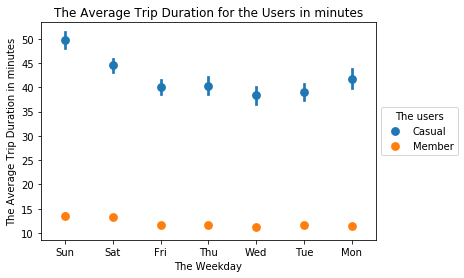

In [14]:
# Create the duration_min column:
df_clean['duration_min'] = df_clean['duration_sec'] /60  # Divid to git sec to mins

# Plot the average trip duration diff between the user based on the day of the week in minutes:
the_plot_min= sb.pointplot(x="day", y="duration_min", hue="user_type",data=df_clean,linestyles="")

# Put the labels:
plt.xlabel('The Weekday');
plt.title('The Average Trip Duration for the Users in minutes')
plt.ylabel('The Average Trip Duration in minutes');

# Put the labels:
the_plot_min.legend(title='The users',loc='center left', bbox_to_anchor=(1, 0.5))

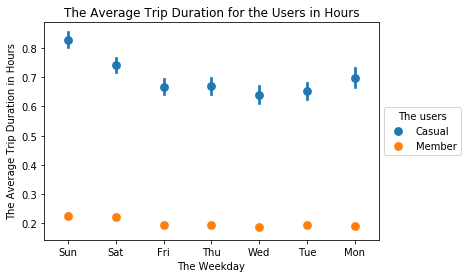

In [15]:
# Create the duration_hour column:
df_clean['duration_hour'] = df_clean['duration_sec'] /3600 # Divid to git sec to hrs 

# Plot the average trip duration diff between the user based on the day of the week in hours:
the_plot_hrs=sb.pointplot(x="day", y="duration_hour", hue="user_type",data=df_clean,linestyles="")

# Put the labels:
plt.xlabel('The Weekday');
plt.title('The Average Trip Duration for the Users in Hours')
plt.ylabel('The Average Trip Duration in Hours');

# Put the legend:
the_plot_hrs.legend(title='The users',loc='center left', bbox_to_anchor=(1, 0.5))